<a href="https://colab.research.google.com/github/hieu0902/DSA-Final/blob/main/HW2_Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

logreg.py

In [1]:
'''
    TEMPLATE FOR MACHINE LEARNING HOMEWORK
    AUTHOR Eric Eaton
'''

import numpy as np

class LogisticRegression:

    def __init__(self, alpha = 0.01, regLambda=0.01, epsilon=0.0001, maxNumIters = 10000):
        '''
        Constructor
        '''
        self.alpha = alpha
        self.regLambda = regLambda
        self.epsilon = epsilon
        self.maxNumIters = maxNumIters
        self.theta = None


    def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
        '''
        n,d = X.shape
        cost = (-y.T * np.log(self.sigmoid(X * theta)) - (1.0 - y).T *
                np.log(1.0 - self.sigmoid(X * theta)))/n + regLambda/(2.0 * n) * (theta.T * theta)
        return cost.item((0,0))


    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient of the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            regLambda is the scalar regularization constant
        Returns:
            the gradient, an d-dimensional vector
        '''

        n, d = X.shape
        gradient = (X.T * (self.sigmoid(X * theta) - y) + regLambda*theta) / n
        # don't regularize the theta_0 parameter
        gradient[0] = sum(self.sigmoid(X * theta) - y) / n
        return gradient

    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
        '''


        a,b = X.shape
        # add the 1's features
        X = np.c_[np.ones((a,1)), X]

        # create a random starting theta
        self.theta = np.mat(np.random.rand(b + 1,1))

        theta_old = self.theta
        theta_new = self.theta

        i = 0
        while i < self.maxNumIters:
            theta_new = theta_old - self.alpha * self.computeGradient(theta_new, X, y, self.regLambda)
            if self.hasConverged(theta_new, theta_old):
                self.theta = theta_new
                return
            else:
                theta_old = np.copy(theta_new)
                i = i + 1
                cost = self.computeCost(theta_new, X, y, self.regLambda)
                # print "cost: ", cost

        self.theta = theta_new

    def hasConverged(self, theta_new, theta_old):
        if np.linalg.norm(theta_new - theta_old) < self.epsilon:
            return True
        else:
            return False


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy matrix
        Returns:
            an n-dimensional numpy vector of the predictions
        '''

        a,b = X.shape
        # add the 1's features
        X = np.c_[np.ones((a,1)), X]
        # use the sigmoid method to predict the values for X
        return np.array(self.sigmoid(X * self.theta))


    def sigmoid(self, Z):
        '''
    	Computes the sigmoid function 1/(1+exp(-z))
    	'''


        return 1.0/(1.0+ np.exp(-Z))



mapFeature.py

In [2]:
import numpy as np
def mapFeature(x1, x2):
    '''
    Maps the two input features to quadratic features.

    Returns a new feature array with d features, comprising of
        X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, ... up to the 6th power polynomial

    Arguments:
        X1 is an n-by-1 column matrix
        X2 is an n-by-1 column matrix
    Returns:
        an n-by-d matrix, where each row represents the new features of the corresponding instance
    '''


    n = x1.size
    arr = np.zeros((n,28))
    for row in range(n):
        count = 0
        for i in range (7):
            for j in range (i+1):
                exp2 = j
                exp1 = i-j
                arr[row][count] = (x1[row]**exp1) * (x2[row]**exp2)
                count += 1
    return arr

test_logreg2.py

<ipython-input-1-aa13039a881a>:33: RuntimeWarning: divide by zero encountered in log
  np.log(1.0 - self.sigmoid(X * theta)))/n + regLambda/(2.0 * n) * (theta.T * theta)
<ipython-input-1-aa13039a881a>:116: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+ np.exp(-Z))


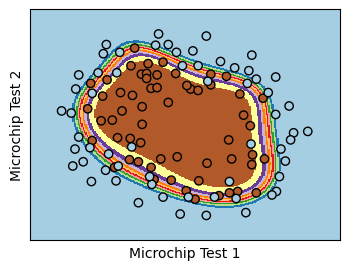

In [5]:
# Test script for training a non-linear logistic regressiom model
#
# Author: Eric Eaton
#
# This file should run successfully without changes if your implementation is correct
#
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt


if __name__ == "__main__":
    # Load Data
    filename = '/content/data2.dat'
    data = loadtxt(filename, delimiter=',')
    X = data[:, 0:2]
    y = np.array([data[:, 2]]).T
    n,d = X.shape

    # Standardize the data
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # map features into a higher dimensional feature space
    X = mapFeature(X[:,0],X[:,1])

    # train logistic regression
    logregModel = LogisticRegression()
    logregModel.fit(X,y)


    # reload the data for 2D plotting purposes
    data = loadtxt(filename, delimiter=',')
    PX = data[:, 0:2]
    y = data[:, 2]

    # Standardize the data
    mean = PX.mean(axis=0)
    std = PX.std(axis=0)
    PX = (PX - mean) / std

    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = PX[:, 0].min() - .5, PX[:, 0].max() + .5
    y_min, y_max = PX[:, 1].min() - .5, PX[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    allPoints = np.c_[xx.ravel(), yy.ravel()]
    allPoints = mapFeature(allPoints[:,0], allPoints[:,1])
    Z = logregModel.predict(allPoints)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(PX[:, 0], PX[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

    # Configure the plot display
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

example_svm.py


Script to Explore SVMs

Simple script to explore SVM training with varying C

Example adapted from scikit_learn documentation by Eric Eaton, 2014


Training the SVM

Testing the SVM


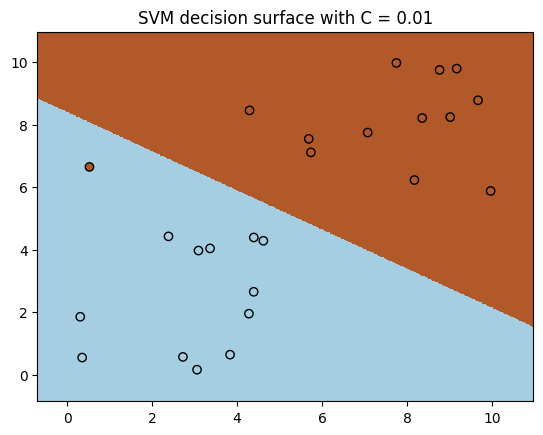

In [6]:
"""
======================
Script to Explore SVMs
======================

Simple script to explore SVM training with varying C

Example adapted from scikit_learn documentation by Eric Eaton, 2014

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


# load the data
filename = '/content/svmData.dat'
allData = np.loadtxt(filename, delimiter=',')

X = allData[:,:-1]
Y = allData[:,-1]


C = 0.01

# train the SVM
print ("Training the SVM")
clf = svm.SVC(C=C,kernel='linear')
clf.fit(X, Y)

print ("")
print ("Testing the SVM")

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,edgecolors='black')
plt.title('SVM decision surface with C = '+str(C))
plt.axis('tight')
plt.show()


Script to Explore SVMs

Simple script to explore SVM training with varying C

Example adapted from scikit_learn documentation by Eric Eaton, 2014


Training the SVM

Testing the SVM


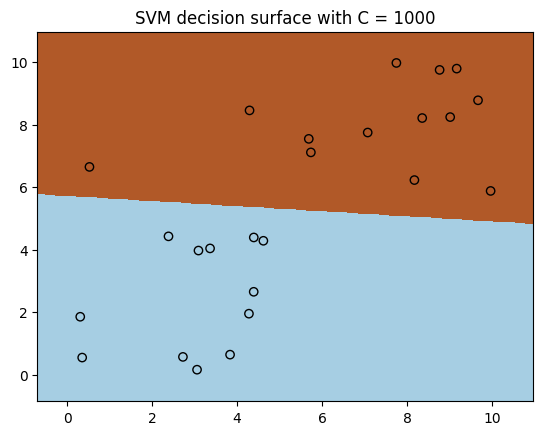

In [7]:
"""
======================
Script to Explore SVMs
======================

Simple script to explore SVM training with varying C

Example adapted from scikit_learn documentation by Eric Eaton, 2014

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


# load the data
filename = '/content/svmData.dat'
allData = np.loadtxt(filename, delimiter=',')

X = allData[:,:-1]
Y = allData[:,-1]


C = 1000

# train the SVM
print ("Training the SVM")
clf = svm.SVC(C=C,kernel='linear')
clf.fit(X, Y)

print ("")
print ("Testing the SVM")

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,edgecolors='black')
plt.title('SVM decision surface with C = '+str(C))
plt.axis('tight')
plt.show()

example_svmCustomKernel.py


SVM with custom kernel

Simple usage of Support Vector Machines to classify a sample. It will
plot the decision surface and the support vectors.

Example adapted from scikit_learn documentation.


Training the SVM
Size X1 =  (150, 2)
Size X2 =  (150, 2)

Testing the SVM
Size X1 =  (61600, 2)
Size X2 =  (150, 2)


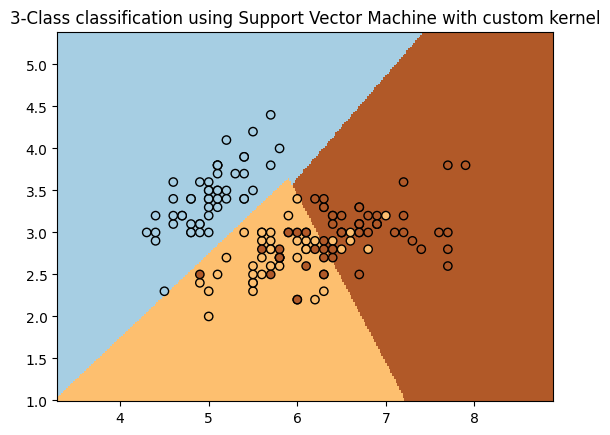

In [ ]:
"""
======================
SVM with custom kernel
======================

Simple usage of Support Vector Machines to classify a sample. It will
plot the decision surface and the support vectors.

Example adapted from scikit_learn documentation.

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
Y = iris.target


def myCustomKernel(X1, X2):
    """
    Custom kernel:
    k(X1, X2) = X1  (3  0) X2.T
                    (0  2)
    """
    print("Size X1 = ", X1.shape)
    print("Size X2 = ", X2.shape)
    M = np.matrix([[3.0, 0], [0, 2.0]])
    return np.dot(np.dot(X1, M), X2.T)


h = .02  # step size in the mesh

# we create an instance of SVM with the custom kernel and train it
print ("Training the SVM")
clf = svm.SVC(kernel=myCustomKernel)
clf.fit(X, Y)

print ("")
print ("Testing the SVM")

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot

Z = Z.reshape(xx.shape)


plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y,cmap=plt.cm.Paired,edgecolors='black')
plt.title('3-Class classification using Support Vector Machine with custom kernel')
plt.axis('tight')
plt.show()

svmKernels.py

In [9]:
"""
Custom SVM Kernels

Author: Eric Eaton, 2014

"""

import numpy as np
from numpy import linalg as LA

_polyDegree = 2
_gaussSigma = 1


def myPolynomialKernel(X1, X2):
    '''
        Arguments:
            X1 - an n1-by-d numpy array of instances
            X2 - an n2-by-d numpy array of instances
        Returns:
            An n1-by-n2 numpy array representing the Kernel (Gram) matrix
    '''

    return (1+np.dot(X1,X2.T))**_polyDegree



def myGaussianKernel(X1, X2):
    '''
        Arguments:
            X1 - an n1-by-d numpy array of instances
            X2 - an n2-by-d numpy array of instances
        Returns:
            An n1-by-n2 numpy array representing the Kernel (Gram) matrix
    '''

    n1,d1 = X1.shape
    n2,d2 = X2.shape

    # find the distance between the v and w vectors to be used in the
    # K(v,w) equation
    distance = np.zeros((n1, n2))
    for i in range(0, n2):
      distance[:,i] = np.sum((X1 - X2[i,:]) ** 2, axis = 1)

    # compute the K(v,w) equation

    sig = 2 * (_gaussSigma ** 2)
    return np.exp(-distance / sig)



def myCosineSimilarityKernel(X1,X2):
    '''
        Arguments:
            X1 - an n1-by-d numpy array of instances
            X2 - an n2-by-d numpy array of instances
        Returns:
            An n1-by-n2 numpy array representing the Kernel (Gram) matrix
    '''

    # X, Y = check_pairwise_arrays(X, Y)

    # X1_normalized = LA.norm(X1)
    # if X1 is X2:
    #     X2_normalized = LA.norm(X1)
    # else:
    #     X2_normalized = LA.norm(X2)

    # norm = X1_normalized * X2_normalized.T
    # return np.dot(X1, X2.T)/norm
    n1,d1 = X1.shape
    n2,d2 = X2.shape


    # prod = np.dot(X1,X2.T)
    norm_1 = np.sqrt((X1 ** 2).sum(axis=1)).reshape(X1.shape[0], 1)
    norm_2 = np.sqrt((X2 ** 2).sum(axis=1)).reshape(X2.shape[0], 1)
    return X1.dot(X2.T) / (norm_1 * norm_2.T)

    # find the distance between the v and w vectors to be used in the
    # K(v,w) equation
    # s1 = LA.norm(X1)
    # s2 = LA.norm(X2)
    # norm = s1*s2
    # return np.dot(X1,X2.T)/norm

    # return K


    # X1=X1.toarray()
    # X2=X2.toarray()
    # X1=np.array(X1.todense())
    # X2=np.array(X2.todense())
    # norm = LA.norm(X1) * LA.norm(X2)
    # return np.dot(X1, X2.T)/norm

test_svmPolyKernel.py


Test SVM with custom polynomial kernels

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.


Training the SVMs...

Testing the SVMs...


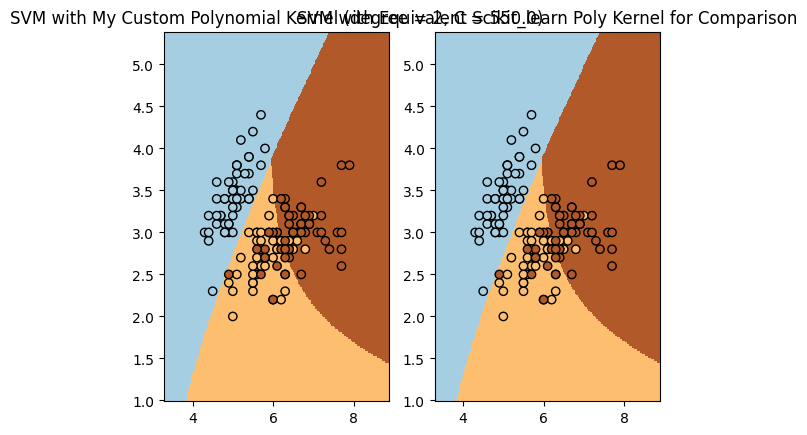

In [ ]:
"""
=======================================
Test SVM with custom polynomial kernels
=======================================

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
Y = iris.target

print ("Training the SVMs...")

C = 550.0  # value of C for the SVMs

# create an instance of SVM with the custom kernel and train it
myModel = svm.SVC(C = C, kernel=myPolynomialKernel)
myModel.fit(X, Y)

# create an instance of SVM with build in poly kernel and train it
model = svm.SVC(C = C, kernel='poly', degree=_polyDegree, coef0=1, gamma=1)
model.fit(X, Y)

print ("")
print ("Testing the SVMs...")

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# get predictions for both my model and true model
myPredictions = myModel.predict(np.c_[xx.ravel(), yy.ravel()])
myPredictions = myPredictions.reshape(xx.shape)

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

# plot my results
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, myPredictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,edgecolors='black') # Plot the training points
plt.title("SVM with My Custom Polynomial Kernel (degree = "+str(_polyDegree) + ", C = "+str(C)+")")
plt.axis('tight')

# plot built-in results
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, predictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,edgecolors='black') # Plot the training points
plt.title('SVM with Equivalent Scikit_learn Poly Kernel for Comparison')
plt.axis('tight')

plt.show()

test_svmGaussianKernel.py


Test SVM with custom Gaussian kernels

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.


Training the SVMs...

Testing the SVMs...


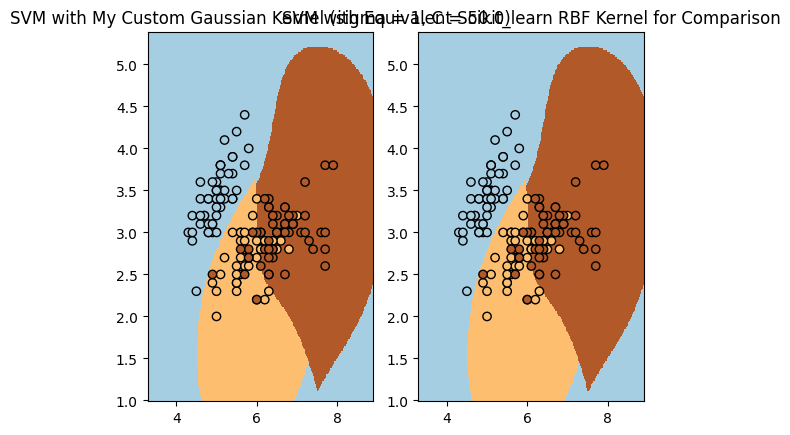

In [ ]:
"""
=====================================
Test SVM with custom Gaussian kernels
=====================================

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
Y = iris.target

print ("Training the SVMs...")

C = 50.0  # value of C for the SVMs

# create an instance of SVM with the custom kernel and train it
myModel = svm.SVC(C = C, kernel=myGaussianKernel)
myModel.fit(X, Y)

# create an instance of SVM with build in RBF kernel and train it
equivalentGamma = 1.0 / (2 * _gaussSigma ** 2)
model = svm.SVC(C = C, kernel='rbf', gamma=equivalentGamma)
model.fit(X, Y)

print ("")
print ("Testing the SVMs...")

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# get predictions for both my model and true model
myPredictions = myModel.predict(np.c_[xx.ravel(), yy.ravel()])
myPredictions = myPredictions.reshape(xx.shape)

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

# plot my results
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, myPredictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,edgecolors='black') # Plot the training points
plt.title("SVM with My Custom Gaussian Kernel (sigma = "+str(_gaussSigma) + ", C = "+str(C)+")")
plt.axis('tight')

# plot built-in results
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, predictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,edgecolors='black') # Plot the training points
plt.title('SVM with Equivalent Scikit_learn RBF Kernel for Comparison')
plt.axis('tight')

plt.show()

test.py (C= 50, h = 10)


Test SVM with custom Gaussian kernels

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.


Training the SVMs...

Testing the SVMs...


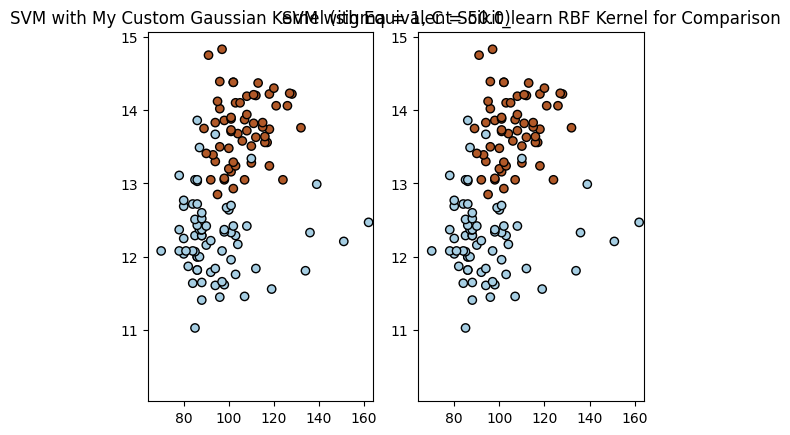

In [13]:
"""
=====================================
Test SVM with custom Gaussian kernels
=====================================

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


# import some data to play with
filename = '/content/svmTuningData.dat'
allData = np.loadtxt(filename, delimiter=',')
X = allData[:,:-1]
Y = allData[:,-1]
print ("Training the SVMs...")

C = 50.0  # value of C for the SVMs

# create an instance of SVM with the custom kernel and train it
myModel = svm.SVC(C = C, kernel=myGaussianKernel)
myModel.fit(X, Y)

# create an instance of SVM with build in RBF kernel and train it
equivalentGamma = 1.0 / (2 * _gaussSigma ** 2)
model = svm.SVC(C = C, kernel='rbf', gamma=equivalentGamma)
model.fit(X, Y)

print ("")
print ("Testing the SVMs...")

h = 10  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# get predictions for both my model and true model
myPredictions = myModel.predict(np.c_[xx.ravel(), yy.ravel()])
myPredictions = myPredictions.reshape(xx.shape)

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

# plot my results
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, myPredictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,edgecolors='black') # Plot the training points
plt.title("SVM with My Custom Gaussian Kernel (sigma = "+str(_gaussSigma) + ", C = "+str(C)+")")
plt.axis('tight')

# plot built-in results
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, predictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,edgecolors='black') # Plot the training points
plt.title('SVM with Equivalent Scikit_learn RBF Kernel for Comparison')
plt.axis('tight')

plt.show()

test.py (C= 50, h = 1)


Test SVM with custom Gaussian kernels

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.


Training the SVMs...

Testing the SVMs...


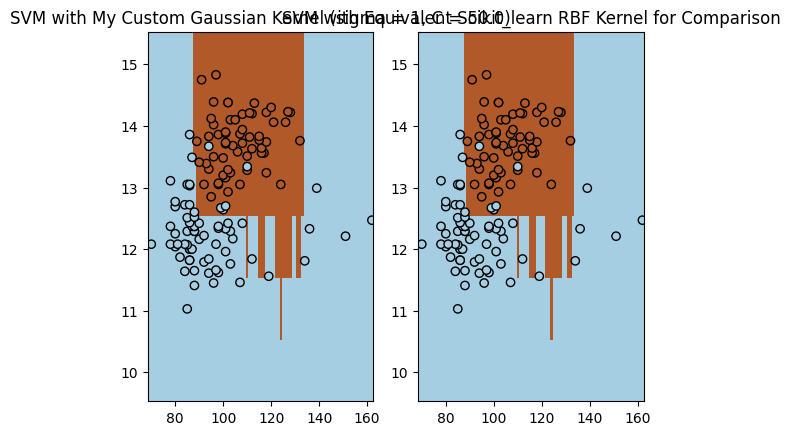

In [21]:
"""
=====================================
Test SVM with custom Gaussian kernels
=====================================

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


# import some data to play with
filename = '/content/svmTuningData.dat'
allData = np.loadtxt(filename, delimiter=',')
X = allData[:,:-1]
Y = allData[:,-1]
print ("Training the SVMs...")

C = 50.0  # value of C for the SVMs

# create an instance of SVM with the custom kernel and train it
myModel = svm.SVC(C = C, kernel=myGaussianKernel)
myModel.fit(X, Y)

# create an instance of SVM with build in RBF kernel and train it
equivalentGamma = 1.0 / (2 * _gaussSigma ** 2)
model = svm.SVC(C = C, kernel='rbf', gamma=equivalentGamma)
model.fit(X, Y)

print ("")
print ("Testing the SVMs...")

h = 1
  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# get predictions for both my model and true model
myPredictions = myModel.predict(np.c_[xx.ravel(), yy.ravel()])
myPredictions = myPredictions.reshape(xx.shape)

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

# plot my results
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, myPredictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,edgecolors='black') # Plot the training points
plt.title("SVM with My Custom Gaussian Kernel (sigma = "+str(_gaussSigma) + ", C = "+str(C)+")")
plt.axis('tight')

# plot built-in results
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, predictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,edgecolors='black') # Plot the training points
plt.title('SVM with Equivalent Scikit_learn RBF Kernel for Comparison')
plt.axis('tight')

plt.show()